# Viral propagation in a population

We want to see the difference betwwen a population of party-goes (aka social snakeys), and those that do social distancing.

Changes in this model, compared to the previous:

Stage 1:

* No food, because it's not relevant
* No hunger
* No new babies

Stage 2:

* Essentially, stable population that doesn't change
* Add a vector of who is healthy and who's not
* Strts with a patient 0

Stage 3:

* Infection based on minimal distance (similar to distance to eat cabbage)
...

    for every person:
     If infected
        calculate distances to every other person
        find all other agents that are closer than this threshold
        infect them
    
 * Output: New cases per snake as a function of time
 
 Stage 4:
 
 
 * Running the visulization:healthy are black infected are red
 * Parameter to model social distancing (something that turns them solitary if at 0, or super-mixing them together if 1): let's make them wiggle (vx=np.random

In [17]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [30]:
# Define constants, but we do it as a class (to later make passing it around easier)

class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_trials = 10
        self.n_snake = 100 # Original n_animals
        self.n_steps = 500
        self.speed = 0.02
        self.arena_size = 3
        
    
        self.biting_distance = 0.2**2       # To avoid running np.sqrt() later

In [33]:
# Build the model
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_snake)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_snake)
        vx = np.zeros(c.n_snake)
        vy = np.zeros(c.n_snake)
        
        infected = np.zeros(c.n_snake)
        infected[0] = 1 #Pt 0
        
        stats = np.zeros(c.n_steps)
        
        
        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = np.random.randn(c.n_snake)*c.speed
            vy = np.random.randn(c.n_snake)*c.speed
            # Make them run around (keeps speed somewhat randomized)

            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
                                
                
            for i_snake in range(c.n_snake):
                if infected[i_snake]==1:
                    d = np.square(x-x[i_snake]) + np.square(y-y[i_snake])
                    bitten = np.argwhere(d < c.biting_distance)
                    infected[bitten] = 1
               
            stats[t] = np.sum(infected)/c.n_snake
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected==0], y[infected==0], 'g.',markersize=5);
                plt.plot(x[infected==1], y[infected==1], 'r.',markersize=5);
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                print('.',end='')
        # --- Time loop is over

        history[:,i_trial] = c.n_snake
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


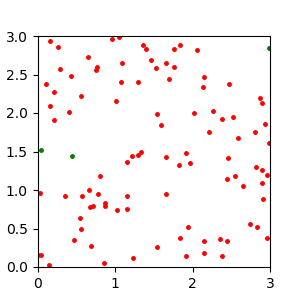

CPU times: user 34.4 s, sys: 906 ms, total: 35.3 s
Wall time: 38.2 s


<IPython.core.display.Javascript object>


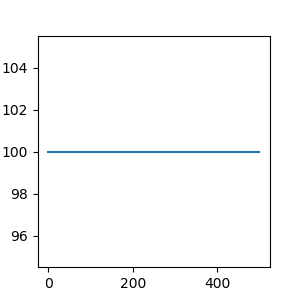

In [34]:
c = Const()
np.random.seed(1)
%time curve = model(c, show_dotses=True);
plt.figure(figsize=(3,3))
plt.plot(curve)